In [1]:
#IMPORTS
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing

## Part 3: VALIDATOR to test
modifier and simulator working in dynamic way, with hardcoded ranges
* next step, extract the ranges 



In [2]:
# DRAFT TEMP FUNCTIONS that will be in validator once they work as intended
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PolynomialFeatures

def get_range(x_values,outliers,delta=0.7):
    x_values = np.array(x_values)
    relative_max = x_values[-1]
    relative_min = x_values[0]
    
    # Calculate ranges of outliers
    outlier_ranges = []

    current_range = [outliers[0]]
    print('current range: ',current_range)

    for i in range(1, len(outliers)):
        x_outlier_ranges = []

        if outliers[i] == outliers[i-1] + 1:
            current_range.append(outliers[i])
        else:
            
            outlier_ranges.append(current_range)
            current_range = [outliers[i]]

    # Add the last range
    outlier_ranges.append(current_range)
    print(outlier_ranges)
    # Get x value ranges for each outlier range
    x_range_max=relative_max
    x_range_min = relative_min
    for outlier_range in outlier_ranges:
        print('\noutlier_range ',outlier_range)
        if np.max(outlier_range)<(np.shape(x_values)[0]-1) and np.min(outlier_range)>0: 
            delta_low=delta*(x_values[np.min(outlier_range)] - x_values[np.min(outlier_range)-1])
            delta_high=delta*np.abs(x_values[np.max(outlier_range)] - x_values[np.max(outlier_range)+1])
            x_range_min = np.min(x_values[outlier_range])-delta_low
            x_range_max = np.max(x_values[outlier_range])+delta_high
            print('I am withing the min max')
        elif x_range_max>relative_max or np.max(outlier_range)==(np.shape(x_values)[0]-1):
            print('I am at max')
            delta_low=delta*(x_values[np.min(outlier_range)] - x_values[np.min(outlier_range)-1])
            x_range_min = np.min(x_values[outlier_range])-delta_low
            x_range_max=relative_max
        elif x_range_min<relative_min or np.min(outlier_range)==0:
            print('I am at min')
            delta_high=delta*np.abs(x_values[np.max(outlier_range)] - x_values[np.max(outlier_range)+1])
            x_range_max = np.max(x_values[outlier_range])+delta_high
            x_range_min = relative_min
        x_outlier_ranges.append((x_range_min, x_range_max))


    print("Ranges of outlier x values:")
    for i, x_range in enumerate(x_outlier_ranges):
        print(f"Outlier Range {i+1}: {x_range[0]} to {x_range[1]}")
    
    return x_outlier_ranges



def curve_fit(mod_x,sim_y, threshold=3):
    # Example data
    # mod_x = [1.0, 2.4347826086956523, 6.260869565217392, 12.478260869565217, 21.08695652173913, 32.086956521739125, 45.47826086956522, 61.26086956521739, 79.43478260869566, 100.0]
    # sim_y = [-18785.46448566434, -22589.28977083527, -13875.22366018544, -8366.169916783167, -10461.393801292468, 5188.58062260236, 76235.86972207189, 197523.09425923007, 435446.98046035116, 1004675.2544642929]

    # Reshape the arrays to match HuberRegressor's expectations
    x_values = np.array(mod_x)
    y_values = np.array(sim_y)

    # Create polynomial features
    poly = PolynomialFeatures(degree=2)
    x_poly = poly.fit_transform(x_values.reshape(-1, 1))

    # Fit a polynomial model using HuberRegressor
    huber_regressor = HuberRegressor()
    huber_regressor.fit(x_poly, y_values)

    # Predict y values based on the fitted polynomial model
    predicted_y_values = huber_regressor.predict(x_poly)

    # Calculate residuals (differences between actual y and predicted y)
    residuals = y_values - predicted_y_values

    # Calculate the median absolute deviation (MAD) of the residuals
    median_absolute_deviation = np.median(np.abs(residuals))

    # Define a threshold for outliers (e.g., 3 times MAD)
    outlier_threshold = threshold * median_absolute_deviation

    # Identify outliers
    outliers = np.where(np.abs(residuals) > outlier_threshold)[0]

    # Identify points of good fit
    good_fit_points = np.where(np.abs(residuals) <= outlier_threshold)[0]

    print("Outlier indices:", outliers)
    print("Good fit indices:", good_fit_points)

    # Plot the original data and the fitted polynomial curve
    plt.scatter(x_values, y_values, label='Data points')
    plt.plot(x_values, predicted_y_values, color='red', label='Fitted polynomial')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Fitted Polynomial and Data Points')
    plt.show()
    return outliers, good_fit_points


## PART 4: Main Func: with Modifier.py

{'domain_min_range': 1, 'domain_max_range': 100, 'modifier_incremental_unit': 3, 'modifier_data_point': 10}

Modifier controller...
  * Interval:  [(1, 100)]
iterations within Modifier:  0


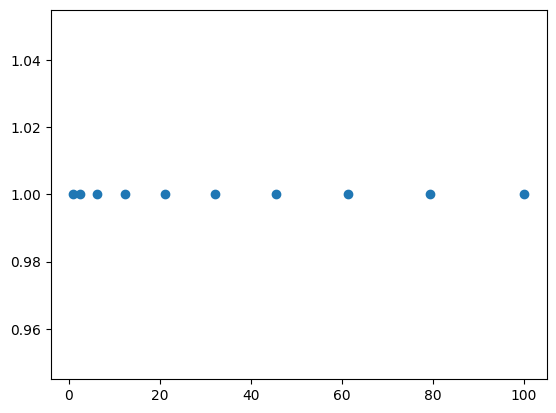

  * Mod_x:    [[1.0, 2.4347826086956523, 6.260869565217392, 12.478260869565217, 21.08695652173913, 32.086956521739125, 45.47826086956522, 61.26086956521739, 79.43478260869566, 100.0]]

Simulator...

this should be a single point:  1.0

this should be a single point:  2.4347826086956523

this should be a single point:  6.260869565217392

this should be a single point:  12.478260869565217

this should be a single point:  21.08695652173913

this should be a single point:  32.086956521739125

this should be a single point:  45.47826086956522

this should be a single point:  61.26086956521739

this should be a single point:  79.43478260869566

this should be a single point:  100.0
  * Sim_y:    [-12645.193848134175, -23989.142832604557, -12872.887878578078, 527.3176986028823, -9057.797923543973, 31882.66442429507, 78919.96795419246, 226505.0870385108, 482252.01908811653, 974024.1218800388]
[1.0, 2.4347826086956523, 6.260869565217392, 12.478260869565217, 21.08695652173913, 32.086956521739125

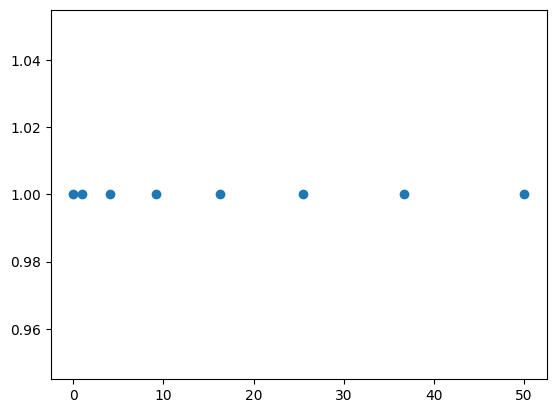

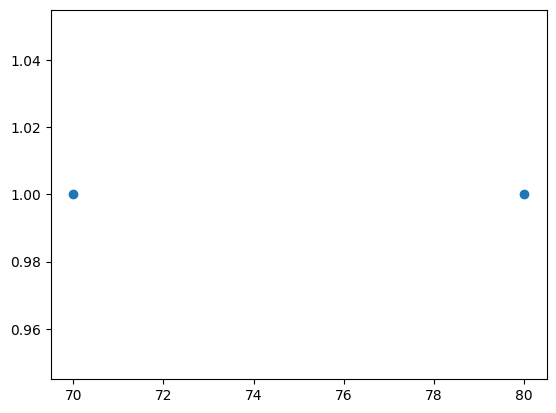

  * Mod_x:    [[0.0, 1.0204081632653061, 4.081632653061225, 9.183673469387756, 16.3265306122449, 25.510204081632654, 36.734693877551024, 50.0], [70.0, 80.0]]

Simulator...

this should be a single point:  0.0

this should be a single point:  1.0204081632653061

this should be a single point:  4.081632653061225

this should be a single point:  9.183673469387756

this should be a single point:  16.3265306122449

this should be a single point:  25.510204081632654

this should be a single point:  36.734693877551024

this should be a single point:  50.0

this should be a single point:  70.0

this should be a single point:  80.0
  * Sim_y:    [-21775.469837296678, -32931.26026608046, -3220.8715396444677, -8960.435139892952, -1230.1626363313708, 8403.408932598277, 44066.63911483029, 128018.674134937, 320043.24022608757, 484795.3012124409]
[0.0, 1.0204081632653061, 4.081632653061225, 9.183673469387756, 16.3265306122449, 25.510204081632654, 36.734693877551024, 50.0, 70.0, 80.0]
[-21775.46983729

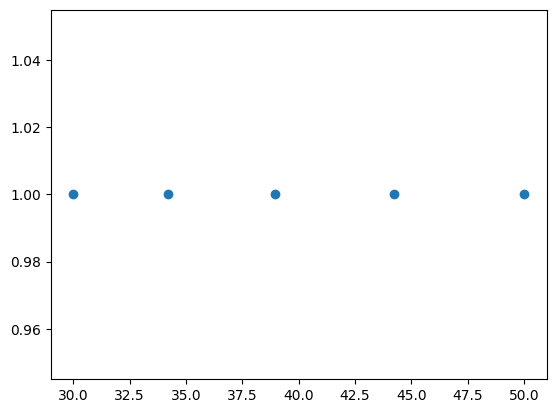

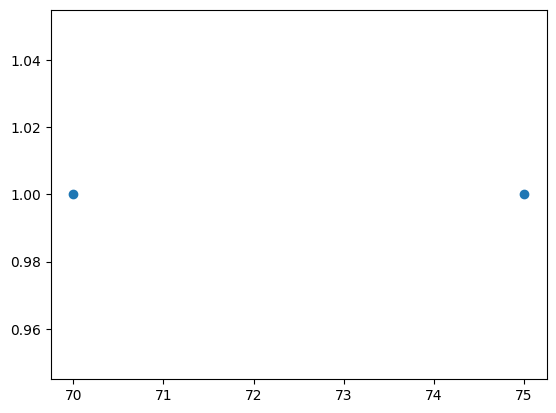

  * Mod_x:    [[30.0, 34.21052631578947, 38.94736842105263, 44.21052631578947, 50.0], [70.0, 75.0]]

Simulator...

this should be a single point:  30.0

this should be a single point:  34.21052631578947

this should be a single point:  38.94736842105263

this should be a single point:  44.21052631578947

this should be a single point:  50.0

this should be a single point:  70.0

this should be a single point:  75.0
  * Sim_y:    [5694.717670396389, 32756.044551183357, 53310.989036581646, 77832.16217694378, 96956.35034536451, 326749.7038828911, 418012.7608383326]
[30.0, 34.21052631578947, 38.94736842105263, 44.21052631578947, 50.0, 70.0, 75.0]
[5694.717670396389, 32756.044551183357, 53310.989036581646, 77832.16217694378, 96956.35034536451, 326749.7038828911, 418012.7608383326]
The END


In [2]:
# PLACEHOLDER FOR THE MAIN FUNCTION V2
%load_ext autoreload
%autoreload 2

from global_settings import mdv
from Validator import Validator
from Modifier import Modifier
from Simulator import Simulator

print(mdv)
#TODO: How to autoreload without restarting kernel (for global vars)
# Instantiate mdv values
# mdv={"domain_min_range":1, "domain_max_range":100, "modifier_incremental_unit":3, "modifier_data_point":10}
# Create an instance of the Validator Class
validate = Validator
modifier = Modifier
simulator = Simulator
appendedvars=[]

mainfunc=True
# Initialize interval list
interval_lists=[(mdv["domain_min_range"], mdv["domain_max_range"])]
x=1
while mainfunc==True:

    # Run Modifier Controller Function
    mod_x_list= modifier.modifier_controller(range_list=interval_lists,local_modifier=modifier.local_modifier_A, do_plot=True)
    # appendedvars.append(mod_x_list)

    #if data can't be generated:
    if mod_x_list == False: # FALSE IF ["modifier_data_point"] < mdv["modifier_incremental_unit"]:
        print('*   ITERATIONS END HERE   *')
        break

    # Run Simulator Function
    
    # for i in range(np.shape(mod_x_list)[0]):

    mod_x,sim_y_list = simulator.simulator_controller(mod_x_list,selected_function=simulator.sim_func_A)
    print((mod_x))
    print((sim_y_list))
    assert len(mod_x) == len(sim_y_list)
    # Get ranges of unfit points ( IF ANY )

    # Run Validator Controller functions
    output = Validator.validator_controller(mod_x_list=mod_x,sim_y_list=sim_y_list,threshold=0.9)
    
        
    # Example Usage:

    # TODO fix error in Validator function
    # TODO: Generate Report
    # ranges = validate.get_unfitting_ranges(mod_x_list=mod_x,sim_y_list=sim_y_list,threshold=0.9)
    # print('these are the ranges of validator\n',ranges)

    ## TODO: Replace for loops with Validator functions that return ranges [(),(),()] format
    if x == 1: 
        ranges = [(0,50),(70,80)]
    elif x == 2:
        ranges = [(30,50),(70,75)]
    elif x==3: 
        ranges = False
    x=x+1
    if mod_x_list == False or not ranges: 
        mainfunc=False
        print('The END')
    interval_lists = ranges


# TODO: 
# Validator needs to work as a loop within itseft that accepts 3 different sets of points
# understand curve fitting
# Fix ranges
